# Sky Segmentation for Agricultural Images

Assumes:
- sky is always visible in the image,
- sky is always on the top half of the image,
- sky occupies no less than 85% of the image's width,
- sky never exceeds 50% of the image,
- sky has blue and white tint, or eventually pink, orange, violet and/or yellow.

In [32]:
from sky_segmentation import KMeansSky, IntensitySky
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [33]:
# Definitions

TRD_PATH = '../resources/therosariodataset/sequence03_selected/'
TRD_FILES = [
    'left_1514557404.402000.png', 'left_1514557432.437000.png', 'left_1514557475.010000.png',
    'left_1514557504.408000.png', 'left_1514557528.874000.png', 'left_1514557564.762000.png',
    'left_1514557578.585000.png', 'left_1514557602.532000.png', 'left_1514557604.999000.png',
]

Z22_PATH = '../resources/zavalla2022/'
Z22_FILES = [
    'left0807.jpg', 'left1187.jpg', 'left1492.jpg',
    'left1550.jpg', 'left1750.jpg', 'left1876.jpg',
]

Z23_PATH = '../resources/zavalla2023/'
Z23_FILES = [
    'left0034.jpg', 'left0162.jpg', 'left0387.jpg',
    'left0707.jpg', 'left0810.jpg',
]

SAVE_IMAGES = False
SAVE_PATH = 'resources/results/'
if SAVE_IMAGES:
    os.makedirs(SAVE_PATH, exist_ok=True)

In [34]:
# Read images
def read_images(path, imlist):
    images = []
    for imname in imlist:
        img = plt.imread(path+imname)
        images.append(img)
    return images

# Make a gridplot of the images
def plot_images_grid(imlist, step=3):
    rows = -(len(imlist) // -step)  # ceiling = upside-down floor
    fig, axs = plt.subplots(rows, step)
    for i,img in enumerate(imlist):
        axs[i//step, i%step].imshow(img)
        axs[i//step, i%step].axis('off')
    return fig, axs

## Original Images

/tmp/ipykernel_142828/2821272058.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_142828/2821272058.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_142828/2821272058.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


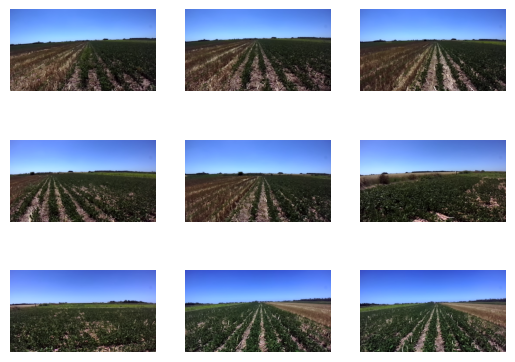

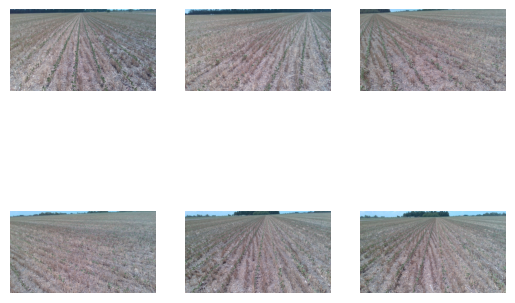

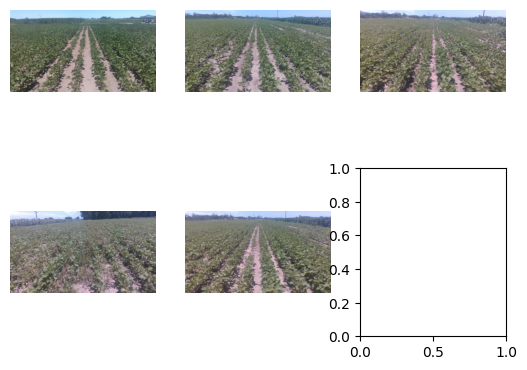

In [35]:
# The Rosario Dataset
trd_images = read_images(TRD_PATH, TRD_FILES)
fig, axs = plot_images_grid(trd_images)
fig.show()

# Zavalla 2022
z22_images = read_images(Z22_PATH, Z22_FILES)
fig, axs = plot_images_grid(z22_images)
fig.show()

# Zavalla 2023
z23_images = read_images(Z23_PATH, Z23_FILES)
fig, axs = plot_images_grid(z23_images)
fig.show()

## Segmented Images

## Sky Segmentation